# Fingerprints

In [44]:
from rdkit.Chem import Draw
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import MACCSkeys
from rdkit.Chem.Draw import IPythonConsole #rozsireni pro kresleni v Jupyteru

In [6]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supp if m]

In [12]:
mfp = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]
mfp[0:5]

In [18]:
set(mfp[666].GetOnBits())

{1,
 3,
 13,
 33,
 64,
 80,
 147,
 175,
 283,
 316,
 356,
 371,
 414,
 428,
 457,
 534,
 568,
 625,
 628,
 650,
 656,
 677,
 695,
 726,
 747,
 759,
 764,
 786,
 807,
 833,
 849,
 881,
 893,
 913,
 924,
 952,
 953,
 968,
 1019}

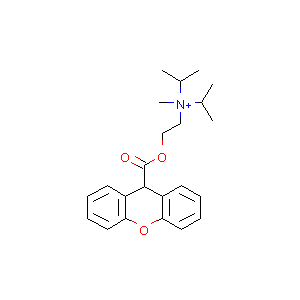

In [19]:
Draw.MolToImage(drugbank[666])

In [25]:
mfp_2_512 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=512) for m in drugbank]
mfp_2_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024) for m in drugbank]
mfp_2_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=2048) for m in drugbank]

mfp_3_512 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=512) for m in drugbank]
mfp_3_1024 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=1024) for m in drugbank]
mfp_3_2048 = [Chem.GetMorganFingerprintAsBitVect(m, 3, nBits=2048) for m in drugbank]

In [26]:
def fp_density(fps):
    sum_on_bit_dens = sum((len(fp.GetOnBits()) / fp.GetNumBits() for fp in fps))
    return sum_on_bit_dens / len(fps) #average density

In [33]:
densities = [fp_density(fps) for fps in (mfp_2_512, mfp_2_1024, mfp_2_2048,
                             mfp_3_512, mfp_3_1024, mfp_3_2048)]
densities

[0.07596557445499297,
 0.038865813994374124,
 0.01966605957718003,
 0.10068345639943742,
 0.05196974441807314,
 0.026418213234001408]

mfp_2_512... 7,5 % bitu je zapnuto. Pri zvetseni pole 2x se 2x zmensi ta hustota.

In [31]:
avg_on_bits = [x*y for x,y in zip(densities,(512,1024,2048,512,1024,2048))]
avg_on_bits

[38.8943741209564,
 39.7985935302391,
 40.2760900140647,
 51.54992967651196,
 53.21701828410689,
 54.10450070323488]

In [35]:
drugbank_maccs = [MACCSkeys.GenMACCSKeys(m) for m in drugbank]

In [37]:
fp_density(drugbank_maccs), fp_density(drugbank_maccs)*166 
#hustota a prumerny pocet zapnutych bitu pro MACCSKeys

(0.26487447046834517, 43.9691620977453)

In [38]:
mfp_2_166 = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits=166) for m in drugbank]

In [39]:
fp_density(mfp_2_166), fp_density(mfp_2_166)*166 
#to same pro Morganuv fingerprint s delkou 166

(0.21416128649620272, 35.55077355836965)

In [41]:
bitinfo = {}
Chem.GetMorganFingerprintAsBitVect(drugbank[666], 2, nBits = 512, bitInfo = bitinfo)
bitinfo


{1: ((4, 0), (5, 0)),
 3: ((15, 1), (16, 1)),
 13: ((12, 1),),
 22: ((14, 1),),
 33: ((7, 0), (8, 0), (9, 0), (10, 0), (11, 0)),
 56: ((14, 2),),
 64: ((23, 1), (25, 1), (24, 1), (26, 1)),
 80: ((6, 0), (12, 0)),
 113: ((3, 2),),
 116: ((7, 1),),
 138: ((2, 0),),
 144: ((1, 0),),
 147: ((0, 1),),
 165: ((17, 2), (18, 2)),
 175: ((23, 2), (25, 2), (24, 2), (26, 2)),
 183: ((0, 0),),
 214: ((19, 1), (20, 1), (21, 1), (22, 1)),
 235: ((13, 1),),
 247: ((1, 2),),
 252: ((0, 2),),
 274: ((1, 1),),
 283: ((8, 1), (9, 1), (10, 1), (11, 1)),
 295: ((14, 0),),
 316: ((13, 2),),
 321: ((6, 2),),
 337: ((19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0)),
 356: ((15, 0), (16, 0), (17, 0), (18, 0)),
 369: ((17, 1), (18, 1)),
 371: ((19, 2), (20, 2)),
 381: ((2, 1),),
 401: ((6, 1),),
 412: ((3, 1),),
 414: ((3, 0),),
 428: ((12, 2),),
 440: ((4, 2), (5, 2)),
 441: ((15, 2), (16, 2)),
 456: ((4, 1), (5, 1)),
 457: ((21, 2), (22, 2)),
 507: ((13, 0),)}

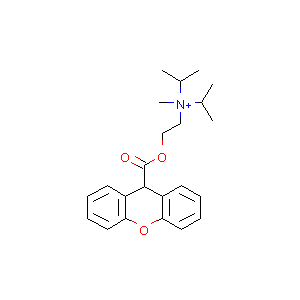

In [46]:
Draw.MolToImage(drugbank[666])

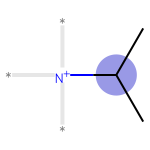

In [77]:
Draw.DrawMorganBit(drugbank[666], 456, bitinfo)

In [49]:
def bit2smiles(mol, bit):
    bitinfo = {}
    Chem.GetMorganFingerprintAsBitVect(mol, 2, nBits = 512, bitInfo = bitinfo)
    fragments = set()
    for hit, radius in bitinfo.get(bit, []):
        if radius > 0:
            hit_atoms = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, hit)
            submol = Chem.PathToSubmol(mol, hit_atoms)
            fragment_smiles = Chem.MolToSmiles(submol)
        else:
            fragment_smiles = mol.GetAtomWithIdx(hit).GetSymbol()
        fragments.add(fragment_smiles)
    return fragments

In [76]:
bit2smiles(drugbank[666], 456)

{'CC(C)[NH3+]'}

# Podobnost

In [81]:
def tanimoto(fp1, fp2):
    #pomer sumy pruniku a sumy sjednoceni bitu
    fp1_on = set(fp1.GetOnBits())
    fp2_on = set(fp2.GetOnBits())
    all_bits = fp1_on.union(fp2_on)
    shared_bits = fp1_on.intersection(fp2_on)
    if not all_bits:
        raise ValueError("EMPTY")
    return len(shared_bits)/len(all_bits)

In [85]:
tanimoto(mfp[0], mfp[666])

0.14516129032258066

In [86]:
tanimoto(Chem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles("CCO"), 2, nBits=1024), mfp[666])

0.07142857142857142

TODO: Najit latky podobne aspirinu podle Tanimota.